In [1]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pickle

## Importer les modèles ici 


In [2]:
model_1 = pickle.load(open('data_model_1.p', 'rb'))
model_2 = pickle.load(open('data_model_2.p', 'rb'))
model_3 = pickle.load(open('data_model_3.p', 'rb'))

In [3]:
loss_1, auc_1, m_auc_1 = model_1['loss'], model_1['auc'], model_1['class_auc']
loss_2, auc_2, m_auc_2 = model_2['loss'], model_2['auc'], model_2['class_auc']
loss_3, auc_3, m_auc_3 = model_3['loss'], model_3['auc'], model_3['class_auc']

In [9]:
print(type(m_auc_1))
print(type(m_auc_1[0]))

<class 'list'>
<class 'dict'>


In [6]:
print(type(loss_1))
print(len(loss_1))

<class 'list'>
10


# Loss Modèle 1 vs Modèle 2 

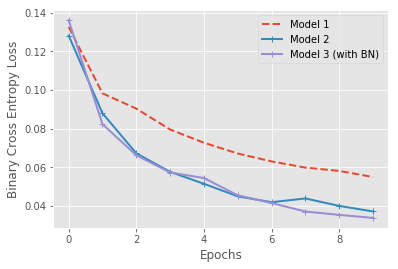

In [4]:
# Loss
x = [i for i in range(10)]

fig, ax = plt.subplots()
line1, = ax.plot(x, loss_1, '--', linewidth=2,
                 label='Model 1')
line2, = ax.plot(x, loss_2, '-+', linewidth=2,
                 label='Model 2')
line3, = ax.plot(x, loss_3, '-+', linewidth=2,
                 label='Model 3 (with BN)')

ax.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('Binary Cross Entropy Loss')
plt.show()
fig.savefig('loss.png', dpi=300)

# AUC moyenne et par classe


In [5]:
def get_class_auc(data):
    ''' Fonction qui prépare les données pour le plot
    '''
    toxic = []
    stoxic = []
    obscene = []
    threat = []
    insult = []
    id_hate = []

    for data in data:
        toxic.append(data['toxic'])
        stoxic.append(data['severe_toxic'])
        obscene.append(data['obscene'])
        threat.append(data['threat'])
        insult.append(data['insult'])
        id_hate.append(data['identity_hate'])
    
    return toxic, stoxic, obscene, threat, insult, id_hate

labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'indentity_hate']

In [6]:
print(m_auc_1[0])
print(m_auc_2[0])

{'toxic': 0.8436752497537638, 'severe_toxic': 0.8443434343434344, 'obscene': 0.8469981953824115, 'threat': 0.9358074222668005, 'insult': 0.8592244468765423, 'identity_hate': 0.9053807106598984}
{'toxic': 0.8258813087854877, 'severe_toxic': 0.8877777777777778, 'obscene': 0.8345705196182397, 'threat': 0.9789368104312938, 'insult': 0.8814566836198202, 'identity_hate': 0.8791201353637902}


## Modèle 1

In [111]:
classAuc = get_class_auc(m_auc_1)

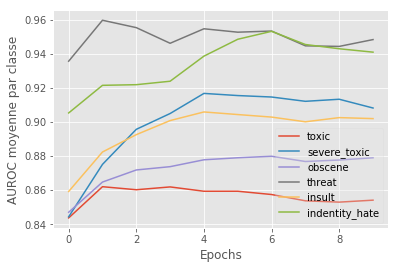

In [112]:
fig = plt.figure()
x = [i for i in range(10)]
for y, label in zip(classAuc, labels):
    plt.plot(x, y, label=label)
    
plt.legend(loc = "lower right", framealpha=0.3)
plt.xlabel('Epochs')
plt.ylabel('AUROC moyenne par classe')
plt.show()
fig.savefig('m1_class.png', dpi=300)

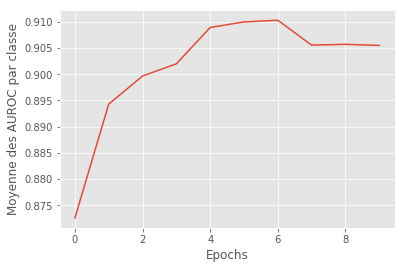

In [113]:
fig = plt.figure()
plt.plot(x, auc_1)
plt.xlabel('Epochs')
plt.ylabel('Moyenne des AUROC par classe')
plt.show()
fig.savefig('m1_mean.png', dpi=300)

## Modèle 2

In [114]:
classAuc2 = get_class_auc(m_auc_2)

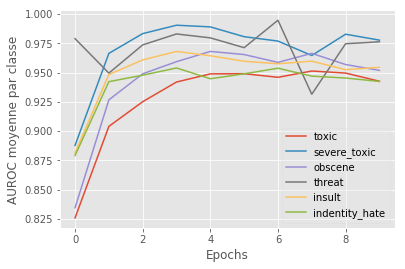

In [115]:
fig = plt.figure()
x = [i for i in range(10)]
for y, label in zip(classAuc2, labels):
    plt.plot(x, y, label=label)
    
plt.legend(loc = "lower right", framealpha=0.3)
plt.xlabel('Epochs')
plt.ylabel('AUROC moyenne par classe')
plt.show()
fig.savefig('m2_class.png', dpi=300)

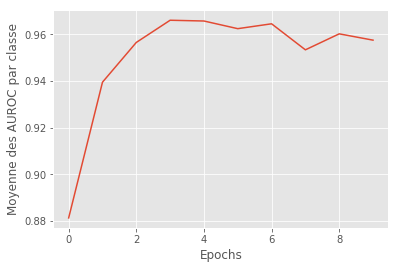

In [116]:
fig = plt.figure()
plt.plot(x, auc_2)
plt.xlabel('Epochs')
plt.ylabel('Moyenne des AUROC par classe')
plt.show()
fig.savefig('m2_mean.png', dpi=300)

## Modèle 3

In [117]:
classAuc3 = get_class_auc(m_auc_3)

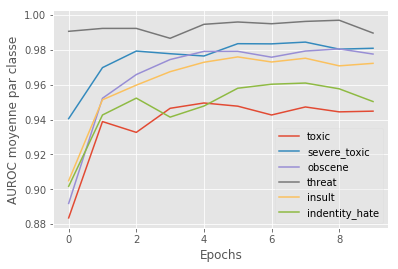

In [118]:
fig = plt.figure()
x = [i for i in range(10)]
for y, label in zip(classAuc3, labels):
    plt.plot(x, y, label=label)
    
plt.legend(loc = "lower right", framealpha=0.3)
plt.xlabel('Epochs')
plt.ylabel('AUROC moyenne par classe')
plt.show()
fig.savefig('m3_class.png', dpi=300)

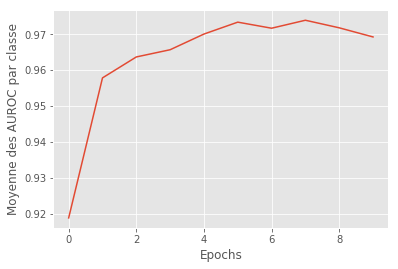

In [119]:
fig = plt.figure()
plt.plot(x, auc_3)
plt.xlabel('Epochs')
plt.ylabel('Moyenne des AUROC par classe')
plt.show()
fig.savefig('m3_mean.png', dpi=300)